In [1]:
import SimpleITK as sitk
import sys
sys.path.insert(1,'../')
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from src.visualization.visualize import *
from src.features.build_features import *

/home/mohamed/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data = (pd.read_csv("../scratch_pad/csv_files/new_merged.csv"))

In [3]:
from tqdm import tqdm
def calculate_mean_std_with_variance(ds_train,n_batches_in_iter=100,n_iter=20):
    all_all_mean=[]
    all_all_std=[]
    for _ in tqdm(range(n_iter)):
        train_dataloader = DataLoader(ds_train, batch_size=n_batches_in_iter, shuffle=True)
        x = next(iter(train_dataloader))
        mean= (x[0]/1000).mean()
        std= (x[0]/1000).std()
        all_all_mean.append(mean)
        all_all_std.append(std)
    return all_all_mean,all_all_std

In [4]:
class dataset(Dataset):
    def __init__(self,data_frame,image_compose,target_compose):
        self.data_frame = data_frame
        self.image_compose = image_compose
        self.target_compose = target_compose

    def __getitem__(self,item):
        # print(item)
        file = self.data_frame.iloc[item]['filename']
        if self.image_compose:
            image = self.image_compose(file)
        if self.target_compose:
            mask = self.target_compose(file)
        return image,mask
    def __len__(self):
        return len(self.data_frame)


In [5]:
training_data_transformations = transforms.Compose(
    [
        transforms.Lambda(convert_to_pil),
        # transforms.Lambda(histogram),
        transforms.Lambda(to_numpy),
        transforms.ToTensor(),
        transforms.Lambda(wrapper_function),
        transforms.Resize((512,512)),
        # transforms.Lambda(normalize),
    ]
)
training_data_transformations_mask = transforms.Compose(
    [
        transforms.Lambda(convert_to_pil),
        transforms.Lambda(to_numpy),
        transforms.ToTensor(),
        transforms.Lambda(normalize),
    ]
)


In [6]:
ds_train = dataset(data,training_data_transformations,training_data_transformations_mask)

In [7]:
dl_train = DataLoader(ds_train, batch_size=1, shuffle=True)

In [8]:
x = next(iter(dl_train))

In [14]:
## when running this make sure that the normalize is closed
all_mean,all_std = calculate_mean_std_with_variance(ds_train=ds_train)
mean = np.median(all_mean)
std = np.median(all_std)

100%|██████████| 20/20 [00:09<00:00,  2.03it/s]


(22.578527, 13.966416)

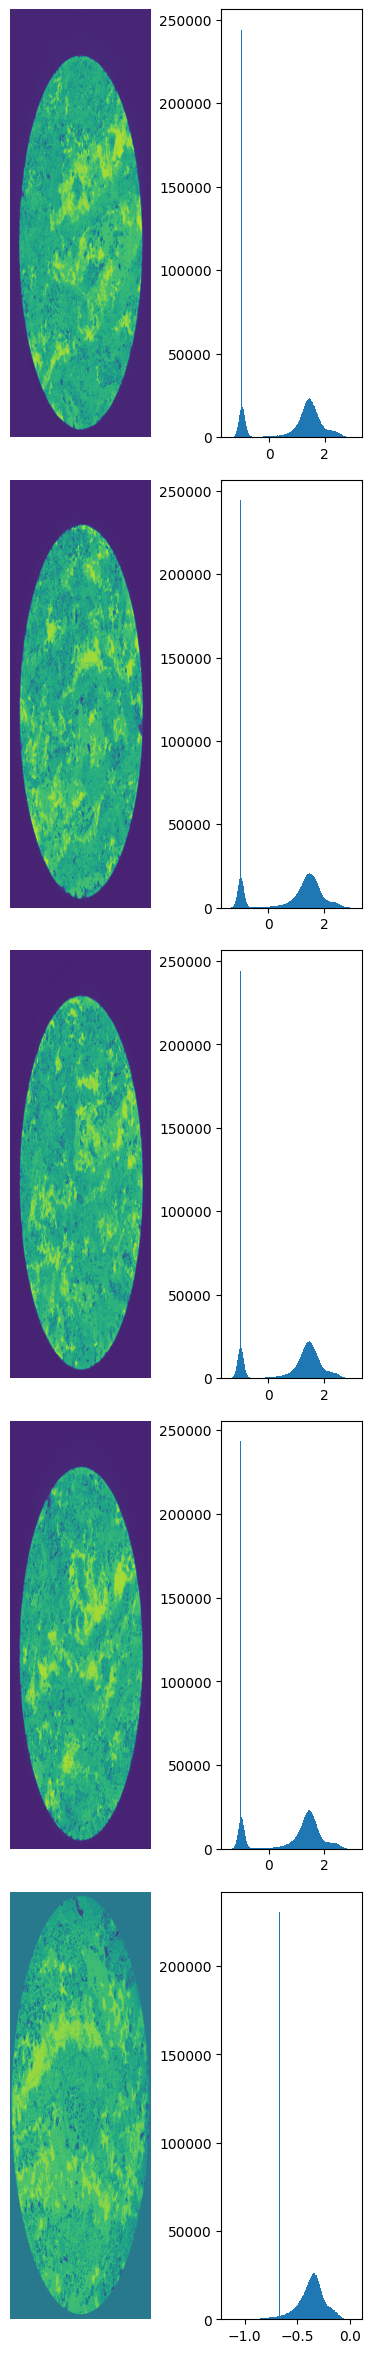

In [15]:
plot_norm_images_histogram(data,5,'filename',(22.34057*1000),(13.787962*1000))